## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Load Dataset

In [2]:
Data=pd.read_csv('employees.csv')

# Data Preprocessing

# Checking  Info About Columns

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
First Name           933 non-null object
Gender               855 non-null object
Start Date           1000 non-null object
Last Login Time      1000 non-null object
Salary               1000 non-null int64
Bonus %              1000 non-null float64
Senior Management    933 non-null object
Team                 957 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB



# Converting the columns datatypes

In [3]:
# Object convert into date time
SD=Data['Start Date']=pd.to_datetime(Data['Start Date'])   
   

# Object convert into date time
LLT=Data['Last Login Time']=pd.to_datetime(Data['Last Login Time'])

# Object convert into Bool
Senior_mang=Data['Senior Management']=Data['Senior Management'].astype('bool')


# Object convert into date Category
Gender=Data['Gender']=Data['Gender'].astype('category')




# Test Column Info

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
First Name           933 non-null object
Gender               855 non-null category
Start Date           1000 non-null datetime64[ns]
Last Login Time      1000 non-null datetime64[ns]
Salary               1000 non-null int64
Bonus %              1000 non-null float64
Senior Management    1000 non-null bool
Team                 957 non-null object
dtypes: bool(1), category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 49.0+ KB


# Checking Features/Columns &  Samples/Attributes/Rows

In [5]:
Samples=Data.shape[0]
Features=Data.shape[1]

print(f' - Samples of the Features : {Samples}')
print(f' - Features of the Data set : {Features}')

 - Samples of the Features : 1000
 - Features of the Data set : 8


## Indetify the columns names

In [6]:
print('----------------------')
print("Columns of the DataSet")
print('----------------------')
for i in Data.columns:
    print('-' , i)

----------------------
Columns of the DataSet
----------------------
- First Name
- Gender
- Start Date
- Last Login Time
- Salary
- Bonus %
- Senior Management
- Team


# Data Cleaning

### Checking Null Values

In [7]:
Data.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management      0
Team                  43
dtype: int64

### Clean Null Values

In [8]:
Data['Gender']=Data['Gender'].fillna(Data['Gender'].mode()[0])  
Data['Team']=Data['Team'].fillna(Data['Team'].mode()[0])   
Data['First Name']=Data['First Name'].fillna(Data['First Name'].mode()[0])   


### Test Null Values

In [9]:
Data.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

# Insight From Data Sets

# Visualization Number of Male and Female in Company

In [10]:
Gender=Data['Gender']

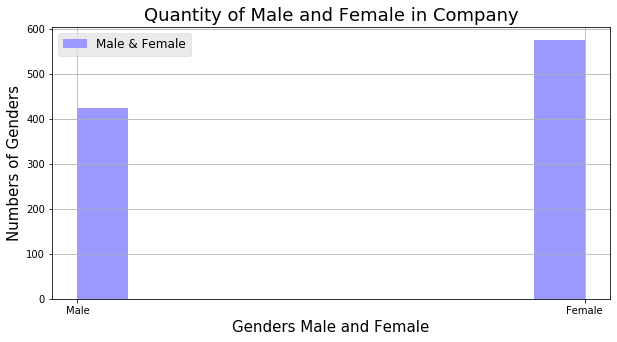

In [11]:
plt.figure(figsize=(10,5))
plt.title("Quantity of Male and Female in Company",fontsize=18)
plt.xlabel("Genders Male and Female",fontsize=15)
plt.ylabel("Numbers of Genders",fontsize=15)
plt.hist(Gender,orientation="vertical",color='#9b99fe',label="Male & Female") 
style.use("ggplot")
plt.grid(linestyle="-")
plt.legend(fontsize=12)
plt.show()

# Visualization Number of Employees in Faculty

In [12]:
Data['Team'].dropna(inplace=True)

Team=Data['Team']

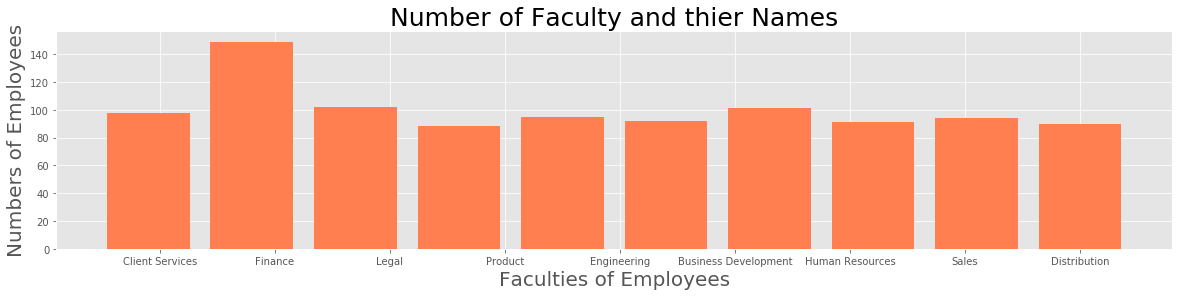

In [13]:
plt.figure(figsize=(20,4))
plt.hist(Team,rwidth=0.8,orientation='vertical',align="right",color='coral')
plt.title("Number of Faculty and thier Names",fontsize=25)
plt.xlabel("Faculties of Employees",fontsize=20)
plt.ylabel("Numbers of Employees",fontsize=20)
plt.show()

# Maximum Salary of the Most Popular Faculty

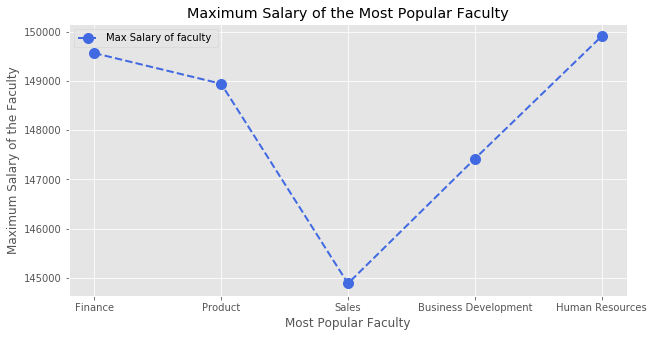

In [14]:
A=Data[(Data['Team']=='Finance' )& (Data['Salary'])]
F=A.Salary.max()

A=Data[(Data['Team']=='Product' )& (Data['Salary'])]
P=A.Salary.max()


A=Data[(Data['Team']=='Sales' )& (Data['Salary'])]
S=A.Salary.max()


A=Data[(Data['Team']=='Business Development' )& (Data['Salary'])]
BD=A.Salary.max()

A=Data[(Data['Team']=='Human Resources' )& (Data['Salary'])]
HR=A.Salary.max()


Values=F,P,S,BD,HR
Team=['Finance','Product','Sales','Business Development','Human Resources']

plt.figure(figsize=(10,5))
plt.title("Maximum Salary of the Most Popular Faculty")
plt.xlabel("Most Popular Faculty")
plt.ylabel("Maximum Salary of the Faculty")

plt.plot(Team,Values,"--o",linewidth=2,markersize=10,label="Max Salary of faculty ",color='royalblue')
plt.legend()
plt.show()

# Maximum Bonus of the Most Popular Faculty

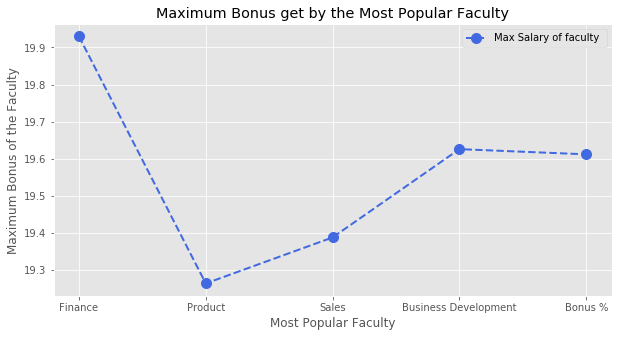

In [15]:
A=Data[(Data['Team']=='Finance' )& (Data['Bonus %'])]
F=A['Bonus %'].max()

A=Data[(Data['Team']=='Product' )& (Data['Bonus %'])]
P=A['Bonus %'].max()


A=Data[(Data['Team']=='Sales' )& (Data['Bonus %'])]
S=A['Bonus %'].max()


A=Data[(Data['Team']=='Business Development' )& (Data['Bonus %'])]
BD=A['Bonus %'].max()

A=Data[(Data['Team']=='Human Resources' )& (Data['Bonus %'])]
HR=A['Bonus %'].max()


Values=F,P,S,BD,HR
Team=['Finance','Product','Sales','Business Development','Bonus %']

plt.figure(figsize=(10,5))
plt.title("Maximum Bonus get by the Most Popular Faculty")
plt.xlabel("Most Popular Faculty")
plt.ylabel("Maximum Bonus of the Faculty")

plt.plot(Team,Values,"--o",linewidth=2,markersize=10,label="Max Salary of faculty ",color='royalblue')
plt.legend()
plt.show()

# Quantity of Seniors in Each Faculty  [Male & Female]

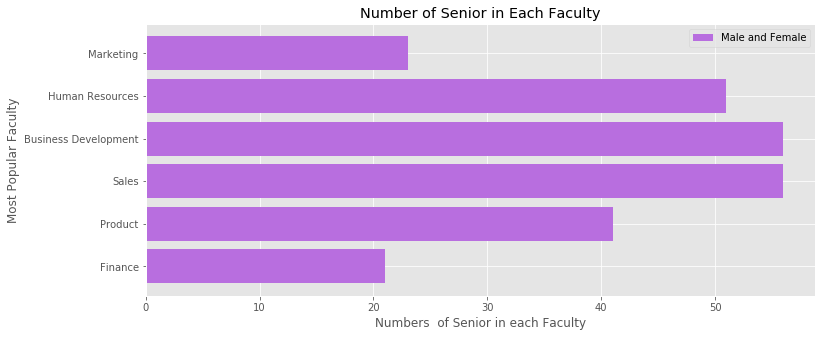

In [16]:
Seniors=Data[(Data['Team']=='Finance')&(Data['Senior Management']==True)&(Data['Gender'].isin(["Male",]))]
F=Seniors['Senior Management'].sum()


Seniors=Data[(Data['Team']=='Marketing')&(Data['Senior Management']==True)&(Data['Gender']=="Male")]
M=Seniors['Senior Management'].sum()


Seniors=Data[(Data['Team']=='Business Development')&(Data['Senior Management']==True)&(Data['Gender'].isin(['Male','Female']))]
BD=Seniors['Senior Management'].sum()


Seniors=Data[(Data['Team']=='Human Resources')&(Data['Senior Management']==True)&(Data['Gender'].isin(['Male','Female']))]
HR=Seniors['Senior Management'].sum()


Seniors=Data[(Data['Team']=='Product')&(Data['Senior Management']==True)&(Data['Gender'].isin(['Male','Female']))]
P=Seniors['Senior Management'].sum()

Seniors=Data[(Data['Team']=='Sales')&(Data['Senior Management']==True)&(Data['Gender'].isin(['Male','Female']))]
S=Seniors['Senior Management'].sum()


plt.figure(figsize=(12,5))
plt.title("Number of Senior in Each Faculty")
plt.ylabel("Most Popular Faculty")
plt.xlabel("Numbers  of Senior in each Faculty")
plt.barh(['Finance','Product','Sales','Business Development','Human Resources',"Marketing"],[F,P,S,BD,HR,M],label="Male and Female",
         color='#b86edf')
plt.legend()
plt.show()



# Greater than 1Lac Salary + Bonus  Seniors (1990<)  & Finance and & HR

In [17]:
info=Data[(Data['Start Date']<'1990')& (Data['Team'].isin(['Finance','Human Resources'])) & (Data['Senior Management']==True) &(Data['Salary']>100000)
          &(Data['Bonus %']>10)]

In [18]:
Name=info['First Name']

Salary_Bonus=info['Salary']+info['Bonus %']

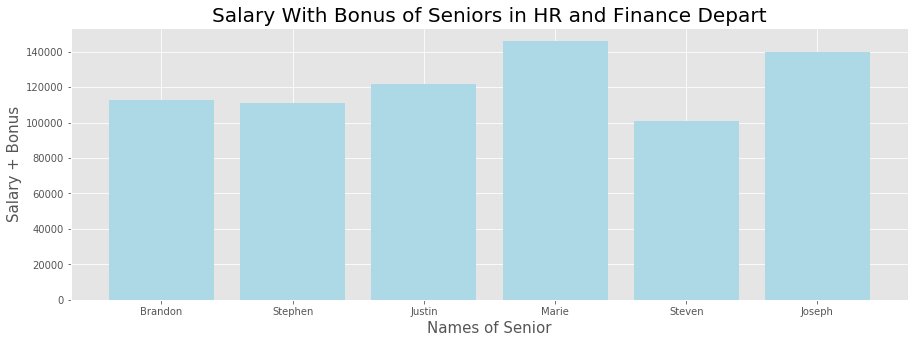

In [19]:
plt.figure(figsize=(15,5))
plt.bar(Name,Salary_Bonus,color='lightblue')
plt.title("Salary With Bonus of Seniors in HR and Finance Depart",fontsize=20)
plt.xlabel("Names of Senior",fontsize=15)
plt.ylabel("Salary + Bonus",fontsize=15)
plt.show()

# Greater than 1Lac Salary + Bonus of Juniors (2000>) & Finance and & HR

In [20]:
info=Data[(Data['Start Date']>='2000')  & (Data['Team'].isin(['Finance','Human Resources'])) & (Data['Senior Management']==False) &(Data['Salary']>100000)
         & (Data['Bonus %']>10)]

In [21]:
Name=info['First Name']

Salary_Bonus=info['Salary']+info['Bonus %']

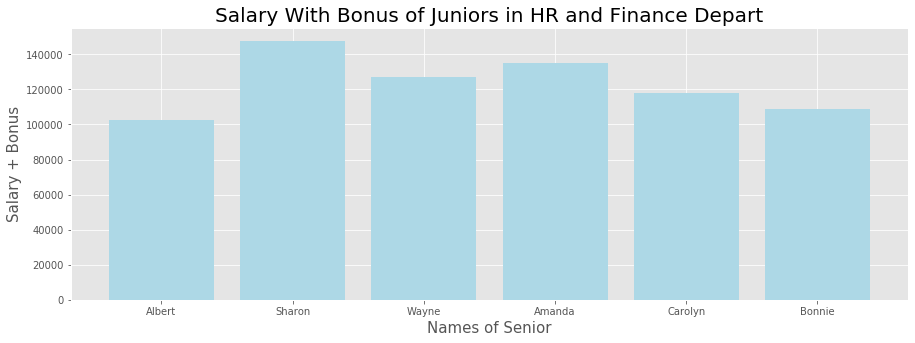

In [22]:
plt.figure(figsize=(15,5))
plt.bar(Name,Salary_Bonus,color='lightblue')
plt.title("Salary With Bonus of Juniors in HR and Finance Depart",fontsize=20)
plt.xlabel("Names of Senior",fontsize=15)
plt.ylabel("Salary + Bonus",fontsize=15)
plt.show()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2020-02-15 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2020-02-15 06:53:00,61933,4.170,True,Client Services
2,Maria,Female,1993-04-23,2020-02-15 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2020-02-15 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2020-02-15 16:47:00,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,Female,2014-11-23,2020-02-15 06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,2020-02-15 06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,2020-02-15 12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,2020-02-15 16:45:00,60500,11.985,False,Business Development
